# Loading Collection Upgrade data
**What does this notebook do?** 

This notebooks demonstrates how to load and manipulate data from the Collection Upgrade trial.

**Requirements:** 

You need to run the following commands from the command line prior to launching jupyter notebooks from the same terminal so that the required libraries and paths are set:

`module use /g/data/v10/public/modules/modulefiles` 

`module load dea`  

If you find an error or bug in this notebook, please either create an 'Issue' in the Github repository, or fix it yourself and create a 'Pull' request to contribute the updated notebook back into the repository (See the repository [README](https://github.com/GeoscienceAustralia/dea-notebooks/blob/master/README.rst) for instructions on creating a Pull request).

**Date:** January 2019

**Author:** Robbi Bishop-Taylor

## Database access

In [1]:
# [datacube]
# db_hostname: agdcstaging-db.nci.org.au
# db_port:     6432
# db_database: ardinteroperability_tmp
    

## Import modules

In [2]:
import os
import sys
import datacube
import numpy as np
from datacube.utils import geometry
from datacube.utils.geometry import CRS

sys.path.append('../10_Scripts')
import SpatialTools, DEAPlotting


## Connect to database

In [3]:
dc_collectionupgrade = datacube.Datacube(config='/home/561/rt1527/.ard-interoperability_tmp.conf')

In [4]:
dc_collectionupgrade.list_products()

,name,description,creation_time,lat,format,lon,platform,label,product_type,instrument,time,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,,,
3,ls5_ard,Landsat 5 ARD datasets for the GA/USGS interop...,None,None,GeoTIFF,None,LANDSAT_5,None,L5ARD,TM,None,NaN,NaN,NaN,NaN
9,ls5_level1_usgs,Landsat 5 USGS Level 1 Collection-1 OLI-TIRS,None,None,GeoTiff,None,LANDSAT_5,None,LS_USGS_L1C1,TM,None,NaN,NaN,NaN,NaN
4,ls5_usgs_l2c1,Landsat 5 Thematic Mapper (TM) USGS Analysis R...,None,None,GeoTiff,None,LANDSAT_5,None,LS_USGS_L2C1,TM,None,NaN,NaN,NaN,NaN
2,ls7_ard,Landsat 7 ARD datasets for the GA/USGS interop...,None,None,GeoTIFF,None,LANDSAT_7,None,L7ARD,ETM+,None,NaN,NaN,NaN,NaN
8,ls7_level1_usgs,Landsat 7 USGS Level 1 Collection-1 OLI-TIRS,None,None,GeoTiff,None,LANDSAT_7,None,LS_USGS_L1C1,ETM,None,NaN,NaN,NaN,NaN
5,ls7_usgs_l2c1,Landsat 7 Enhanced Thematic Mapper Plus (ETM+)...,None,None,GeoTiff,None,LANDSAT_7,None,LS_USGS_L2C1,ETM,None,NaN,NaN,NaN,NaN
1,ls8_ard,Landsat 8 ARD datasets for the GA/USGS interop...,None,None,GeoTIFF,None,LANDSAT_8,None,L8ARD,OLI,None,NaN,NaN,NaN,NaN
10,ls8_l1_pc_usgs,Landsat 8 USGS Level 1 Pre-Collection OLI-TIRS,None,None,GeoTiff,None,LANDSAT_8,None,L1T,OLI_TIRS,None,NaN,NaN,NaN,NaN
7,ls8_level1_usgs,Landsat 8 USGS Level 1 Collection-1 OLI-TIRS,None,None,GeoTiff,None,None,None,level1,None,None,NaN,NaN,NaN,NaN


In [5]:
dc_collectionupgrade.list_measurements().loc['ls8_ard']

,aliases,dtype,flags_definition,name,nodata,spectral_definition,units
measurement,,,,,,,
azimuthal_exiting,[azimuthal_exiting],float32,NaN,azimuthal_exiting,-999,NaN,1
azimuthal_incident,[azimuthal_incident],float32,NaN,azimuthal_incident,-999,NaN,1
exiting,[exiting],float32,NaN,exiting,-999,NaN,1
fmask,[fmask],uint8,NaN,fmask,0,NaN,1
incident,[incident],float32,NaN,incident,-999,NaN,1
lambertian_coastal_aerosol,"[band_1, coastal_aerosol]",int16,NaN,lambertian_coastal_aerosol,-999,"{'response': [7.3e-05, 0.000609, 0.001628, 0.0...",1
lambertian_blue,"[band_2, blue]",int16,NaN,lambertian_blue,-999,"{'response': [1e-05, 6.1e-05, 0.000117, 0.0002...",1
lambertian_contiguity,[lambertian_contiguity],uint8,NaN,lambertian_contiguity,0,NaN,1
lambertian_green,"[band_3, green]",int16,NaN,lambertian_green,-999,"{'response': [-4.6e-05, 1.6e-05, 0.00011, 0.00...",1


## Data availability

<a href="https://imgbb.com/"><img src="https://i.ibb.co/Z1TQvx7/landsat-collectionupgrade.png" alt="landsat-collectionupgrade" border="0"></a>

## Study area
Set the area and time period of interest

In [6]:
query = {'x': (151.28, 151.32),
         'y': (-33.70, -33.74),
         'time': ('2015-06-01', '2015-12-31')}

DEAPlotting.display_map(x=query['x'], y=query['y'], crs='EPSG:4326')

In [7]:
landsat_utm = dc_collectionupgrade.load(product = 'ls8_ard', 
                                        measurements = ['nbart_red', 'nbart_blue', 'nbart_green', 'nbart_nir', 
                                                        'nbart_swir_1', 'nbart_swir_2', 'fmask'],
                                        output_crs = 'EPSG:32756',
                                        resolution = (-30, 30),
                                        group_by = 'solar_day', 
                                        **query)
landsat_utm

<xarray.Dataset>
Dimensions:       (time: 14, x: 127, y: 151)
Coordinates:
  * time          (time) datetime64[ns] 2015-06-04T23:42:53.675563 ... 2015-12-29T23:43:50.151289
  * y             (y) float64 6.27e+06 6.27e+06 6.27e+06 ... 6.265e+06 6.265e+06
  * x             (x) float64 3.406e+05 3.406e+05 ... 3.444e+05 3.444e+05
Data variables:
    nbart_red     (time, y, x) int16 1947 2033 1932 1778 1741 ... 93 88 88 87 75
    nbart_blue    (time, y, x) int16 1809 1913 1874 1713 ... 241 226 204 188
    nbart_green   (time, y, x) int16 2042 2144 2093 1888 ... 266 244 214 192
    nbart_nir     (time, y, x) int16 2915 2956 3148 2997 2825 ... 31 28 23 30 23
    nbart_swir_1  (time, y, x) int16 1744 1879 1861 1618 1573 ... 21 19 21 21 19
    nbart_swir_2  (time, y, x) int16 1490 1618 1541 1373 1316 ... 17 14 15 20 22
    fmask         (time, y, x) uint8 2 2 2 2 2 2 2 2 2 2 ... 5 5 5 5 5 5 5 5 5 5
Attributes:
    crs:      EPSG:32756

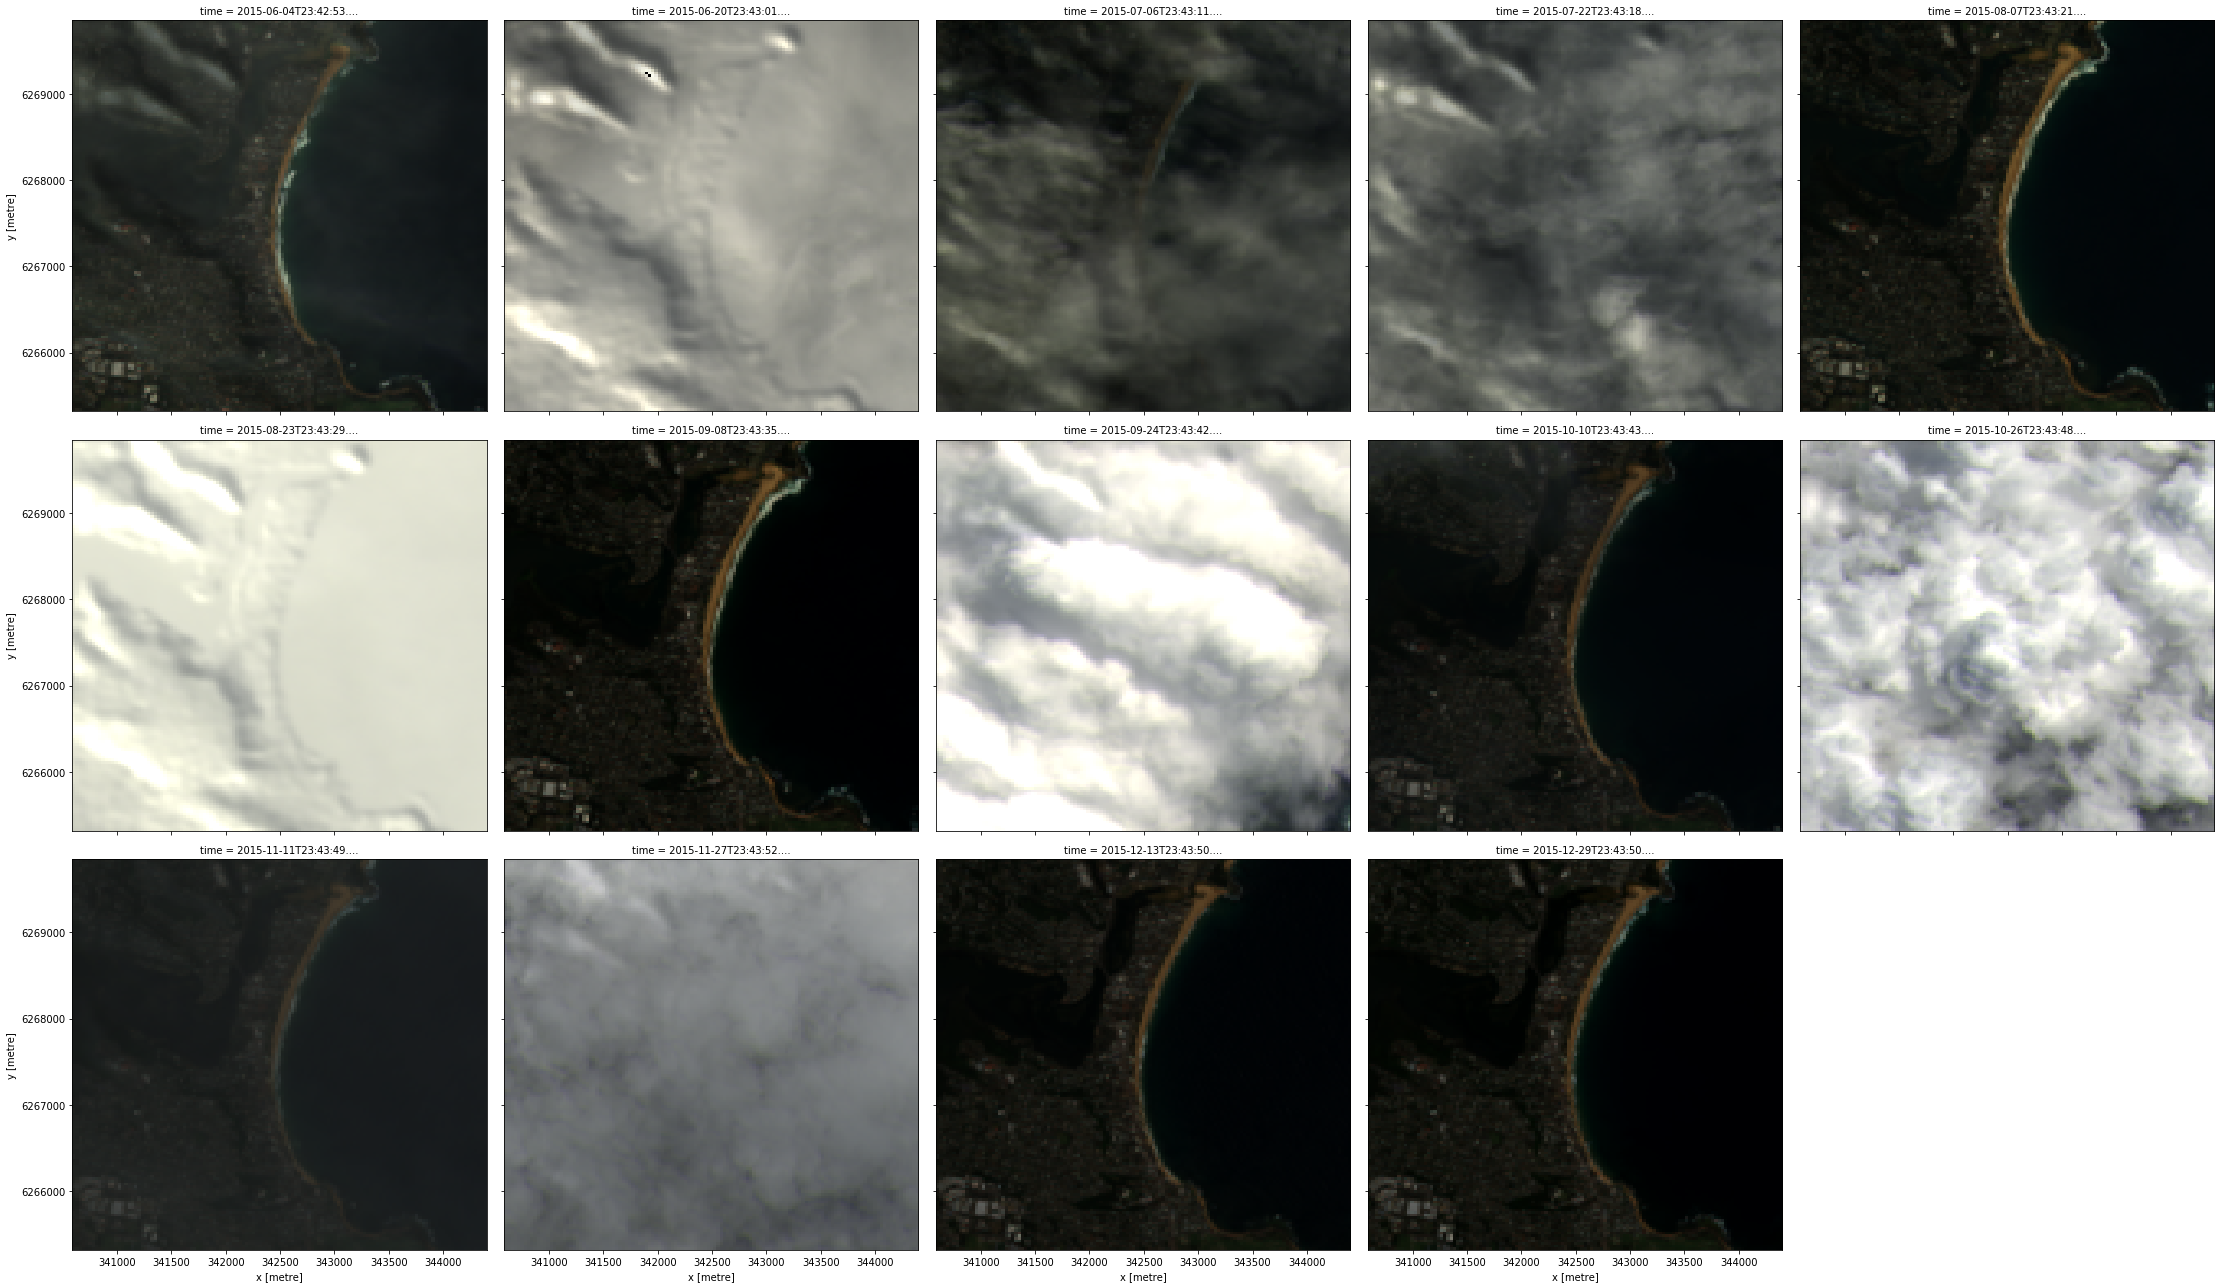

In [8]:
DEAPlotting.rgb(landsat_utm, bands=['nbart_red', 'nbart_green', 'nbart_blue'], col='time', col_wrap = 5)

In [9]:
landsat_albers = dc_collectionupgrade.load(product = 'ls8_ard', 
                                           measurements = ['nbart_red', 'nbart_blue', 'nbart_green', 'nbart_nir', 
                                                           'nbart_swir_1', 'nbart_swir_2', 'fmask'],
                                           output_crs = 'EPSG:3577',
                                           resolution = (-25, 25),
                                           group_by = 'solar_day', 
                                           **query)
landsat_albers

<xarray.Dataset>
Dimensions:       (time: 14, x: 174, y: 199)
Coordinates:
  * time          (time) datetime64[ns] 2015-06-04T23:42:53.675563 ... 2015-12-29T23:43:50.151289
  * y             (y) float64 -3.811e+06 -3.811e+06 ... -3.816e+06 -3.816e+06
  * x             (x) float64 1.77e+06 1.77e+06 1.77e+06 ... 1.774e+06 1.774e+06
Data variables:
    nbart_red     (time, y, x) int16 2270 2303 2303 2234 2058 ... 35 33 34 33 32
    nbart_blue    (time, y, x) int16 2076 2120 2120 2055 ... 242 231 224 210
    nbart_green   (time, y, x) int16 2405 2422 2422 2355 ... 166 153 150 135
    nbart_nir     (time, y, x) int16 3510 3462 3462 3424 3244 ... 21 17 15 16 16
    nbart_swir_1  (time, y, x) int16 2003 1976 1976 1934 1790 ... 11 10 9 9 9
    nbart_swir_2  (time, y, x) int16 1698 1718 1718 1665 1543 1421 ... 9 9 9 9 9
    fmask         (time, y, x) uint8 2 2 2 2 2 2 2 2 2 2 ... 5 5 5 5 5 5 5 5 5 5
Attributes:
    crs:      EPSG:3577

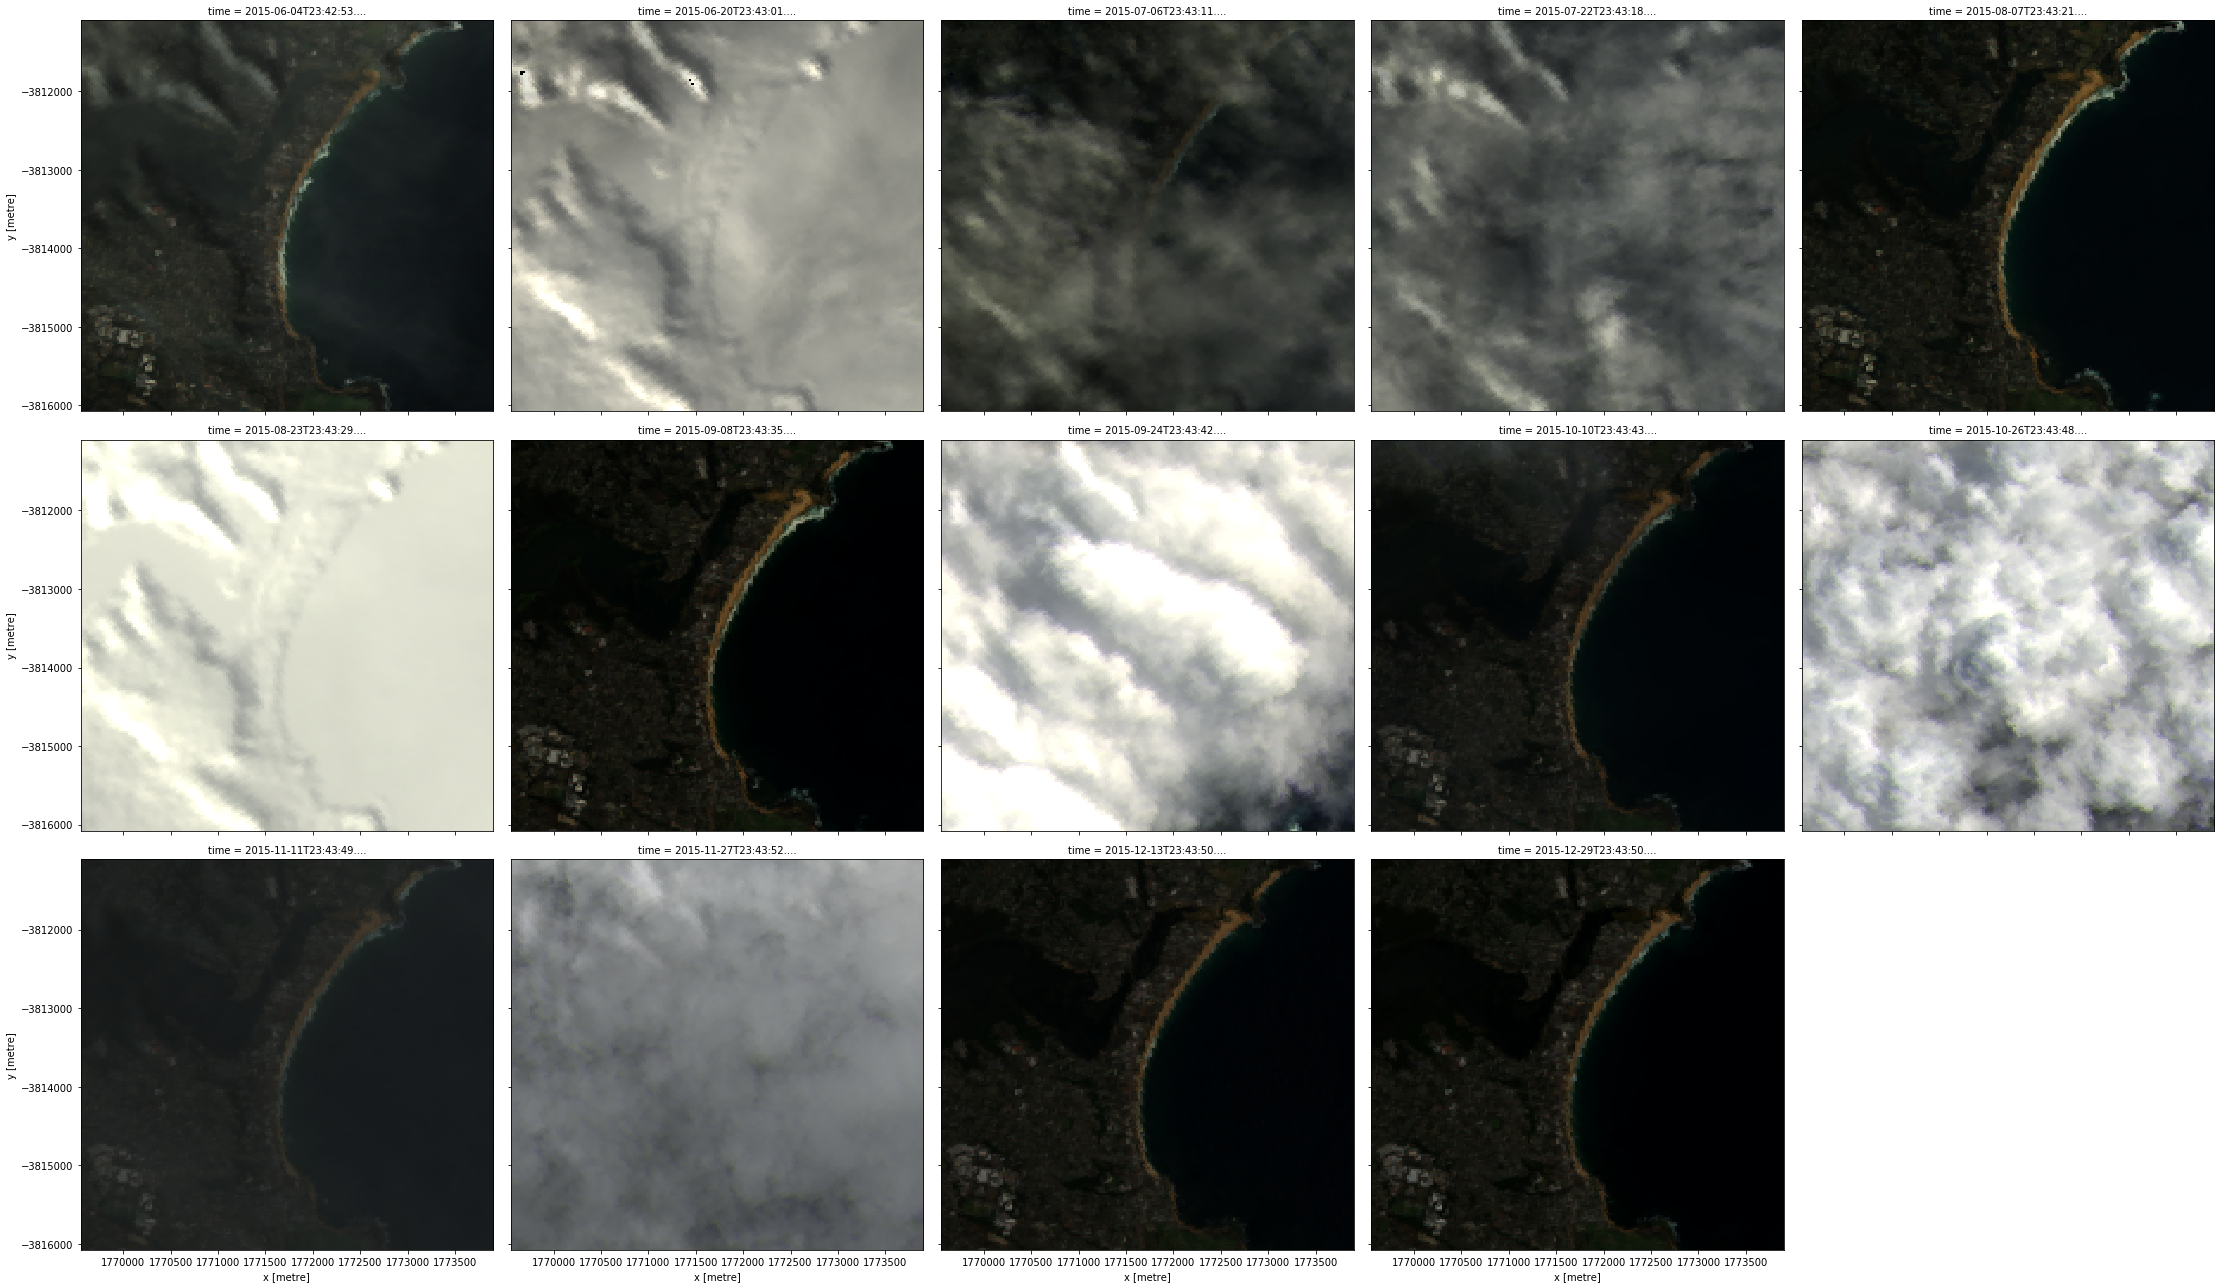

In [10]:
DEAPlotting.rgb(landsat_albers, bands=['nbart_red', 'nbart_green', 'nbart_blue'], col='time', col_wrap = 5)

## Mask by pixel quality/fmask

A pixel quality dataset (`fmask`) is provided alongside the spectral data, which can be used to filter out clouds, cloud shadow or invalid data.

The `fmask` variable contains values from 0 to 5. 

| Value | Description |
|-------|-------------|
| 0 | Invalid/no data |
| 1 | Valid |
| 2 | Cloud |
| 3 | Cloud shadow |
| 4 | Snow |
| 5 | Water |

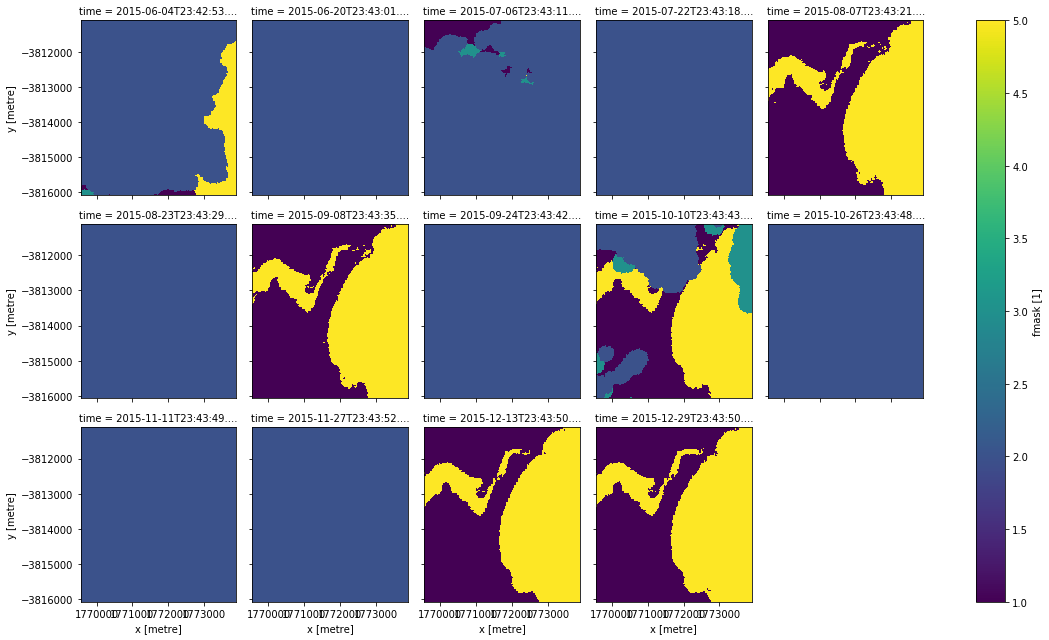

In [11]:
landsat_albers.fmask.plot(col='time', col_wrap = 5)

### Identify pixels which are not invalid/no data, clouds or cloud shadow

In [12]:
good_quality = np.isin(landsat_albers['fmask'], test_elements=(0, 2, 3), invert=True)

In [13]:
landsat_clean = landsat_albers.where(good_quality)
landsat_clean

<xarray.Dataset>
Dimensions:       (time: 14, x: 174, y: 199)
Coordinates:
  * time          (time) datetime64[ns] 2015-06-04T23:42:53.675563 ... 2015-12-29T23:43:50.151289
  * y             (y) float64 -3.811e+06 -3.811e+06 ... -3.816e+06 -3.816e+06
  * x             (x) float64 1.77e+06 1.77e+06 1.77e+06 ... 1.774e+06 1.774e+06
Data variables:
    nbart_red     (time, y, x) float64 nan nan nan nan ... 33.0 34.0 33.0 32.0
    nbart_blue    (time, y, x) float64 nan nan nan nan ... 231.0 224.0 210.0
    nbart_green   (time, y, x) float64 nan nan nan nan ... 153.0 150.0 135.0
    nbart_nir     (time, y, x) float64 nan nan nan nan ... 17.0 15.0 16.0 16.0
    nbart_swir_1  (time, y, x) float64 nan nan nan nan nan ... 10.0 9.0 9.0 9.0
    nbart_swir_2  (time, y, x) float64 nan nan nan nan nan ... 9.0 9.0 9.0 9.0
    fmask         (time, y, x) float64 nan nan nan nan nan ... 5.0 5.0 5.0 5.0
Attributes:
    crs:      EPSG:3577

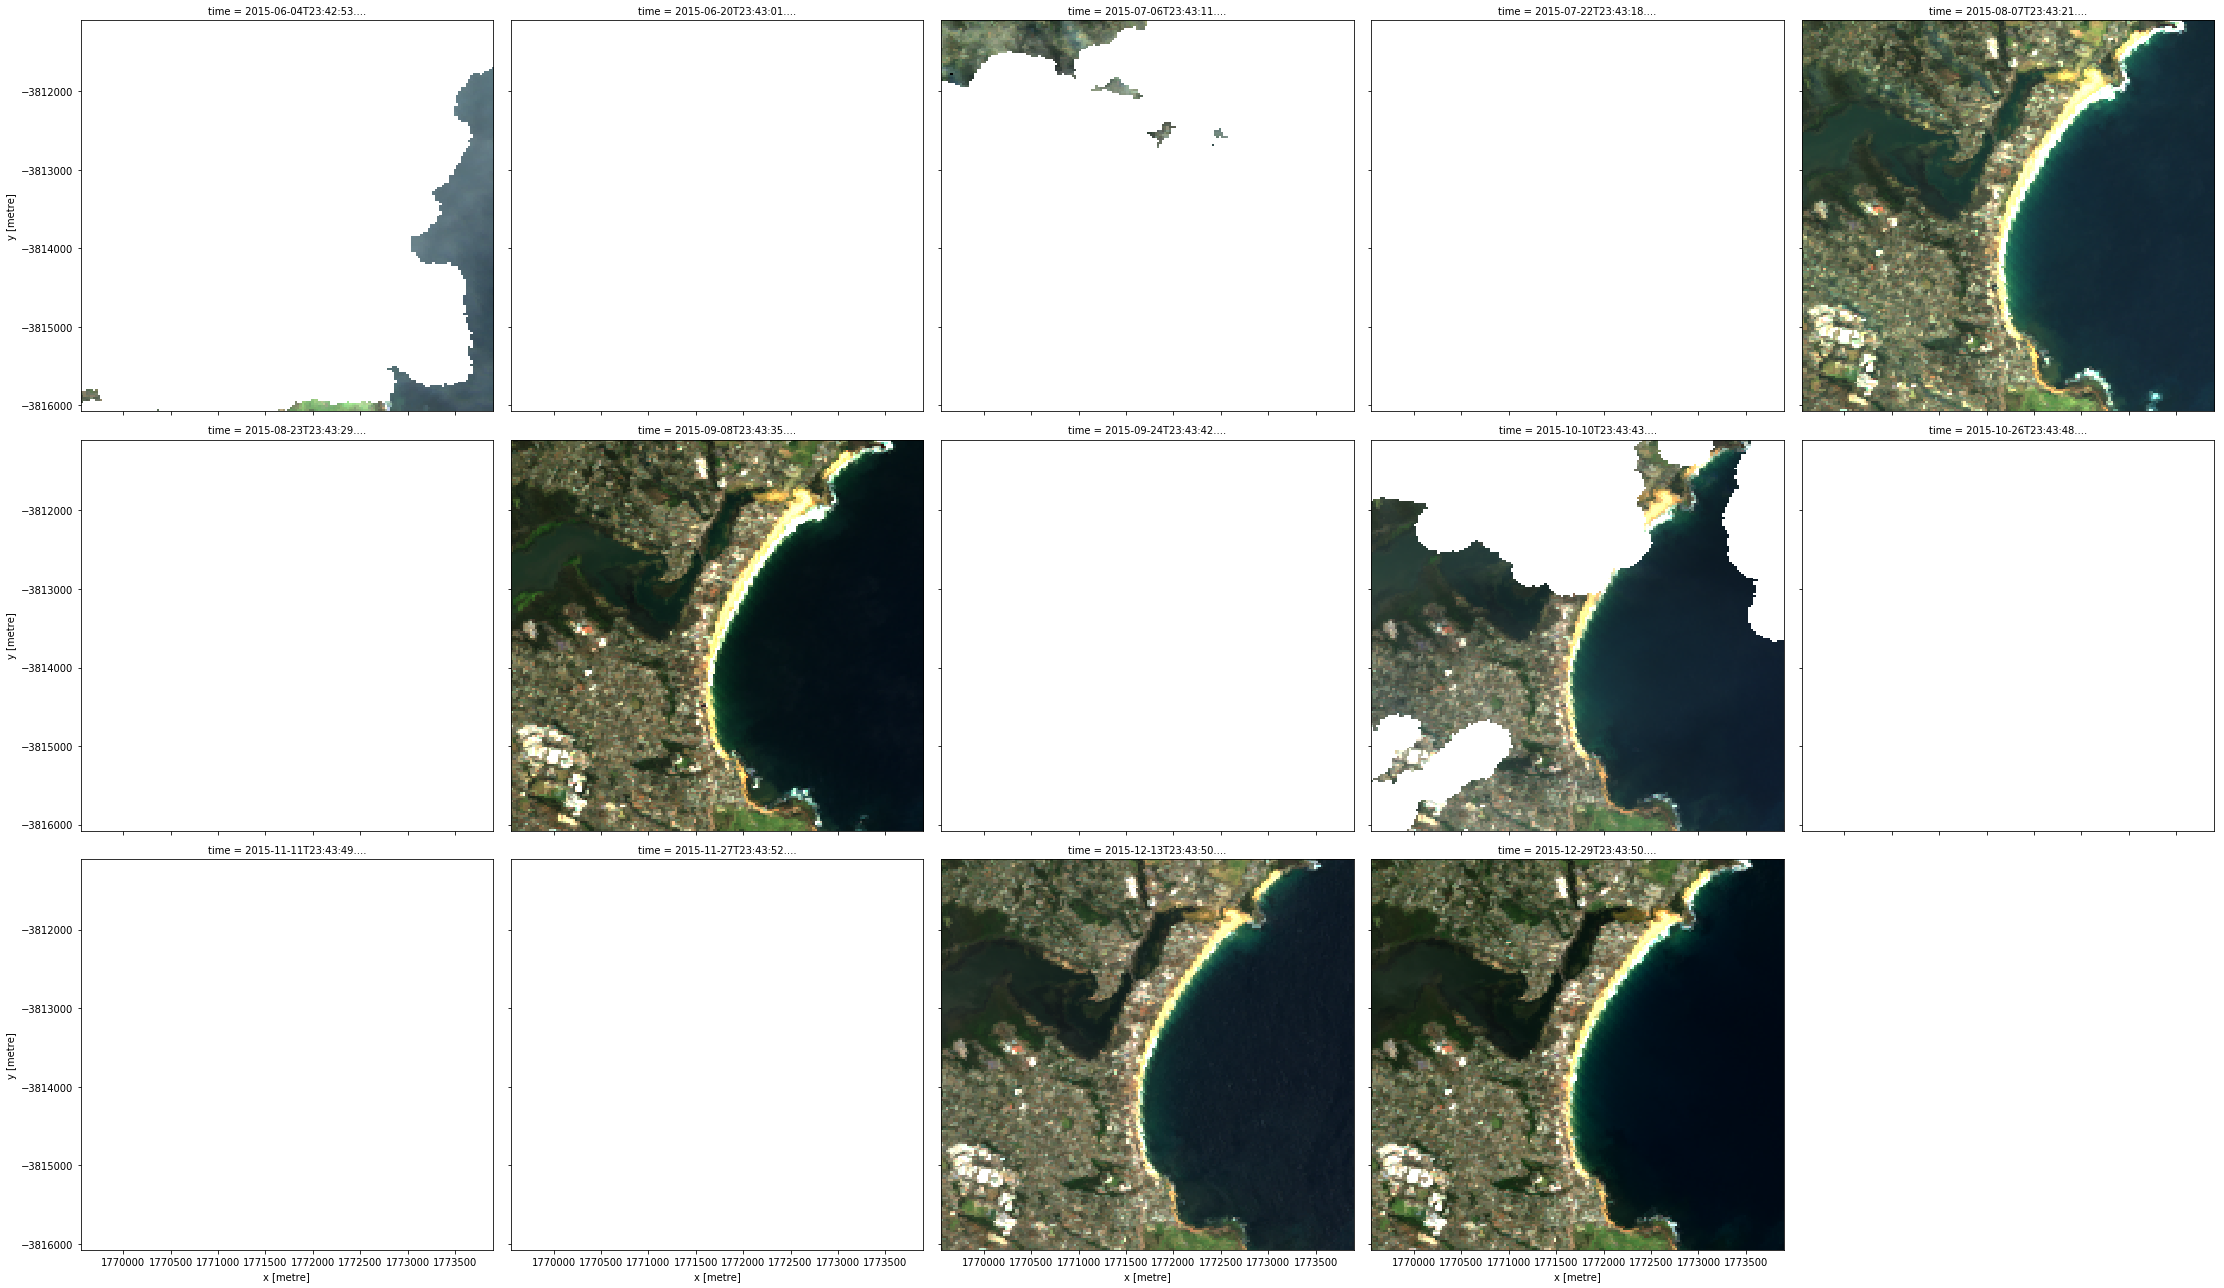

In [14]:
DEAPlotting.rgb(landsat_clean, bands=['nbart_red', 'nbart_green', 'nbart_blue'], col='time', col_wrap = 5)

## Comparison with existing DEA Landsat - resampling issues

In [15]:
# Connect to DEA and load equivelent data
dc = datacube.Datacube()

landsat_ds = dc.load(product = 'ls8_nbart_albers',
                     measurements = ['blue', 'green', 'red'],
                     group_by = 'solar_day', 
                     **query)
landsat_ds


<xarray.Dataset>
Dimensions:  (time: 14, x: 174, y: 199)
Coordinates:
  * time     (time) datetime64[ns] 2015-06-04T23:42:53 ... 2015-12-29T23:43:50
  * y        (y) float64 -3.811e+06 -3.811e+06 ... -3.816e+06 -3.816e+06
  * x        (x) float64 1.77e+06 1.77e+06 1.77e+06 ... 1.774e+06 1.774e+06
Data variables:
    blue     (time, y, x) int16 2169 2119 2125 2077 1942 ... 269 267 260 247 235
    green    (time, y, x) int16 2420 2364 2348 2314 2162 ... 177 176 166 152 144
    red      (time, y, x) int16 2340 2279 2283 2241 2069 1918 ... 47 45 44 46 44
Attributes:
    crs:      EPSG:3577

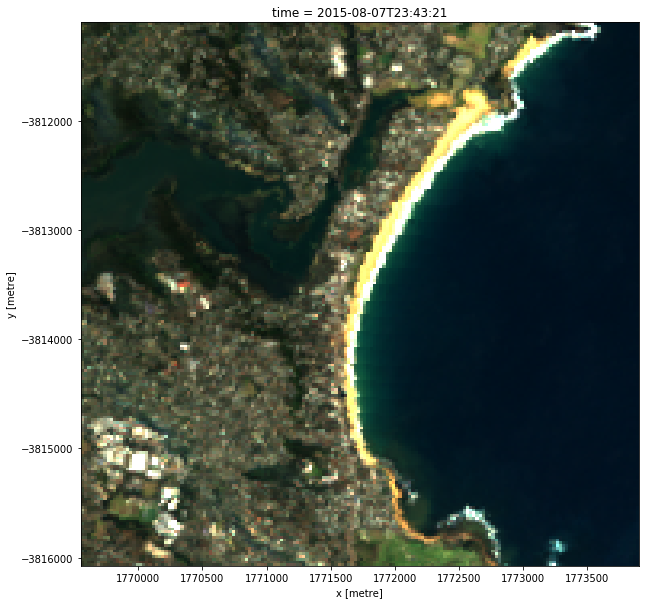

In [16]:
# Plot existing DEA Landsat data
DEAPlotting.rgb(landsat_ds, bands=['red', 'green', 'blue'], index=4, aspect=1, size=10)

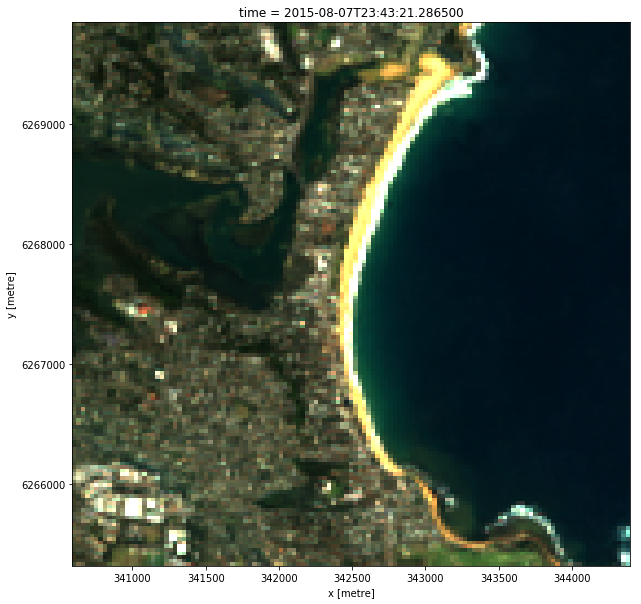

In [17]:
# Plot Collection Upgrade Landsat data in UTM
DEAPlotting.rgb(landsat_utm, bands=['nbart_red', 'nbart_green', 'nbart_blue'], index=4, aspect=1, size=10)

### Examples
https://docs.google.com/presentation/d/1bu0Pl922gjn5THYOYdTD7dGTLRdUaYKgnuIe9iKvJAw/edit?usp=sharing